In [92]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 10.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.4/229.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 7.1 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('fct_invoice.csv')
df2 = pd.read_json("dim_customer.json")
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
### Easy 1
unique_customers=len(df['customer_id'].unique())
print("Unique customers:", unique_customers)

Unique customers: 5191


In [4]:
### Easy 2
unique_categories=df['category'].unique()
print("Unique categories:", unique_categories)

print("How many unique categores:", len(unique_categories))

Unique categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
How many unique categores: 8


In [5]:
### Easy 3
print(df['payment_method'].max())

print(df['payment_method'].value_counts().max())

Debit Card
44447


In [6]:
### Medium 1
df['revenue'] = df['price'] * df['quantity']
most_popular = df.groupby('category')['revenue'].sum().sort_values(ascending=False)
print(most_popular.head(3))



category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: revenue, dtype: float64


In [7]:
### Medium 2
df3=pd.merge(df,df2,left_on="customer_id",right_on="id")

age_45 = df3[df3['age'] > 45]

print(age_45['revenue'].sum())

82039768.15


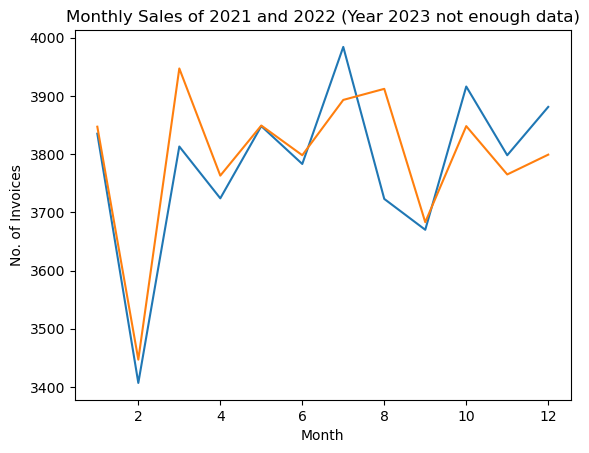

In [9]:
df['date_time'] = pd.to_datetime(df['invoice_date'], format = "%d/%m/%Y")
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year

df.groupby(['year','month']).count()

for year in [2021, 2022]:
    dummy_df = df[df['year'] == year].copy()
    y = dummy_df.groupby('month').count()['revenue']
    x = [i for i in range(1,13)]
    
    if year == 2023:
        x = [1,2,3]
    
    plt.plot(x,y)
    plt.title("Monthly Sales of 2021 and 2022 (Year 2023 not enough data)")
    plt.xlabel("Month")
    plt.ylabel("No. of Invoices")
    
plt.show()

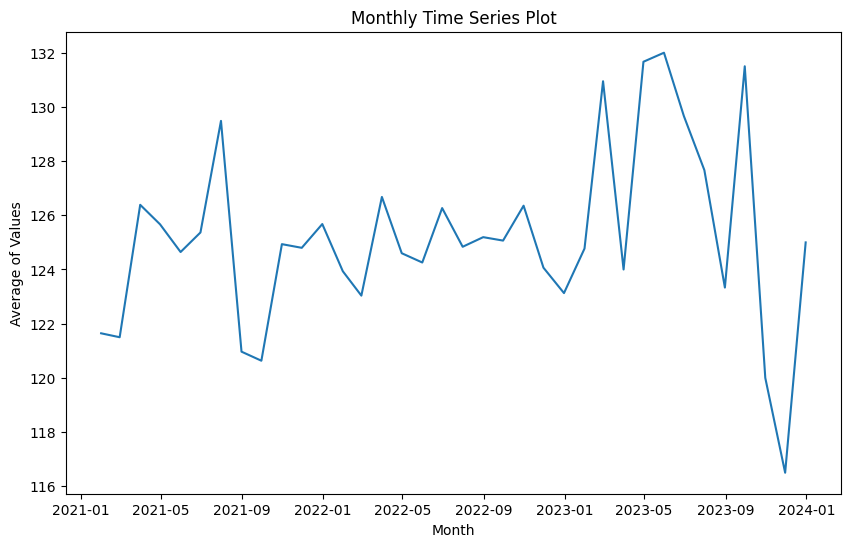

In [168]:
# Convert the index of cool_df to a datetime format
cool_df.index = pd.to_datetime(cool_df.index)

# Resample the DataFrame to monthly frequency and calculate the average of values
cool_df_monthly = cool_df.resample('M').mean()

# Create a new figure and set the figure size
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference

# Plot the time series
plt.plot(cool_df_monthly.index, cool_df_monthly.values)

# Labelling the axes and setting a title
plt.xlabel("Month")
plt.ylabel("Average of Values")
plt.title("Monthly Time Series Plot")

# Display the plot
plt.show()

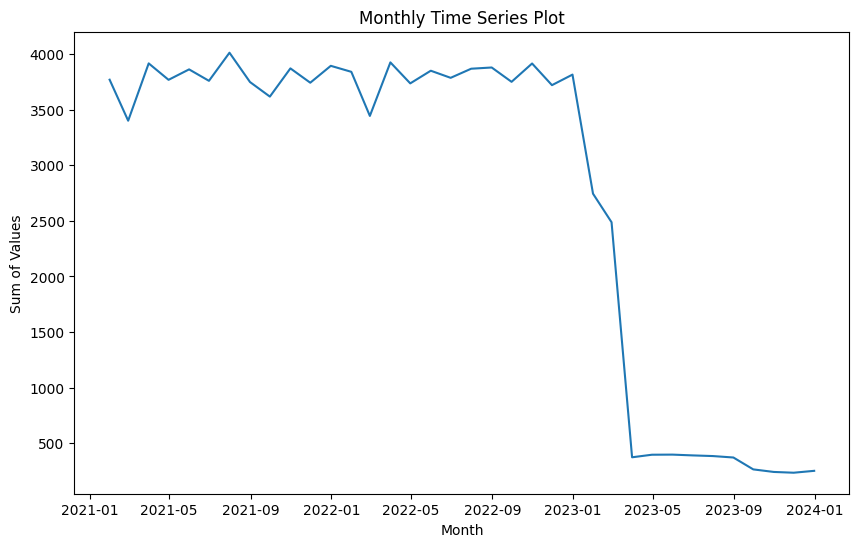

In [19]:
### Hard 1

"""

This is wrong:look baba


bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 100]

# Define the labels for each decade
labels = ['Decade 1', 'Decade 2', 'Decade 3', 'Decade 4', 'Decade 5',
          'Decade 6', 'Decade 7', 'Decade 8', 'Decade 9', 'Decade 10']

# Add a new column 'decade' based on the 'age' column
df3['decade'] = pd.cut(df3['age'], bins=bins, labels=labels, right=False)

# Set the categories of 'decade' explicitly
df3['decade'] = df3['decade'].cat.add_categories('No age given')

# Replace NaN values in the 'decade' column with 'No age given'
df3['decade'].fillna('No age given', inplace=True)

print(df3)

lamesa = pd.pivot_table(df3, values=['revenue'], index=['category'],
                       columns=['decade'], aggfunc=len)

lamesa
"""

"\n\nThis is wrong:look baba\n\n\nbins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 100]\n\n# Define the labels for each decade\nlabels = ['Decade 1', 'Decade 2', 'Decade 3', 'Decade 4', 'Decade 5',\n          'Decade 6', 'Decade 7', 'Decade 8', 'Decade 9', 'Decade 10']\n\n# Add a new column 'decade' based on the 'age' column\ndf3['decade'] = pd.cut(df3['age'], bins=bins, labels=labels, right=False)\n\n# Set the categories of 'decade' explicitly\ndf3['decade'] = df3['decade'].cat.add_categories('No age given')\n\n# Replace NaN values in the 'decade' column with 'No age given'\ndf3['decade'].fillna('No age given', inplace=True)\n\nprint(df3)\n\nlamesa = pd.pivot_table(df3, values=['revenue'], index=['category'],\n                       columns=['decade'], aggfunc=len)\n\nlamesa\n"

In [20]:
new_df = df3[['revenue','category','age']].copy()

new_df = new_df.dropna()

new_df['decade_range'] = new_df['age'].apply(lambda x: str(int(x//10*10))+"-"+str(int(x//10*10+9)) if x != None else x)

table = pd.pivot_table(new_df, values='revenue', index=['category'],
                       columns=['decade_range'], aggfunc=len)


table

decade_range,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89
category,,,,,,,,
Books,75,475,507,510,462,466,351,174
Clothing,563,3168,3389,3407,3085,3250,2349,1361
Cosmetics,235,1355,1636,1487,1329,1441,942,596
Food & Beverage,225,1342,1506,1567,1301,1430,951,555
Shoes,153,902,1022,1033,875,884,676,380
Souvenir,90,453,498,495,426,445,304,188
Technology,85,458,528,524,388,501,309,178
Toys,166,924,1076,1000,870,942,677,412
